Calculation of $\sigma_{ur}$ from cases and deaths timeseries

In [1]:
#import the necessary packages and style for figures

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import math as math
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

plt.style.use('formato_covid19br.mplstyle')

plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

In [26]:
#read the datasets
df = pd.read_csv("manaus.csv")
df["newCases"] = df["newCases"].rolling(window=21).mean()
df["newDeaths"] = df["newDeaths"].rolling(window=21).mean()
df['date'] = pd.to_datetime(df['date'])
df['fatality'] = df.newDeaths / df.newCases * 100
df = df.dropna().reset_index()


In [25]:
#calculate the underreporting coefficient for some testing and epidemiological parameters

df2 = df.copy()
lethreal = 0.75
fih = 0.689

alpha = 0.1
a = -1.0 * alpha * alpha
b =  (1.0 + alpha)

df['c_bas'] = lethreal/(fih * df['fatality'])
df['delta_bas'] = (b*b - 4.0*a*df['c_bas'])**(1/2)
df["teste_U1"] = -1.0*b + df['delta_bas']
df["teste_U1"] = -df["teste_U1"] / (2.0*a)
df['teste_A'] = df["teste_U1"] / 10.0
df['undNot'] = (1.0-df['teste_A'])*(1.0-fih*df['teste_U1'])
df['undNot'] = 1.0*df['undNot']/(df['teste_A'] + (1.0 - df['teste_A'])*fih*df['teste_U1'])

lethreal = 0.55
alpha = 0.1
a = -1.0 * alpha * alpha
b =  (1.0 + alpha)

df['c_bas'] = lethreal/(fih * df['fatality'])
df['delta_bas'] = (b*b - 4.0*a*df['c_bas'])**(1/2)
df["teste_U1"] = -1.0*b + df['delta_bas']
df["teste_U1"] = -df["teste_U1"] / (2.0*a)
df['teste_A'] = df["teste_U1"] / 10.0
df['undNot2'] = (1.0-df['teste_A'])*(1.0-fih*df['teste_U1'])
df['undNot2'] = 1.0*df['undNot2']/(df['teste_A'] + (1.0 - df['teste_A'])*fih*df['teste_U1'])

lethreal = 0.95
alpha = 0.1
a = -1.0 * alpha * alpha
b =  (1.0 + alpha)

df['c_bas'] = lethreal/(fih * df['fatality'])
df['delta_bas'] = (b*b - 4.0*a*df['c_bas'])**(1/2)
df["teste_U1"] = -1.0*b + df['delta_bas']
df["teste_U1"] = -df["teste_U1"] / (2.0*a)
df['teste_A'] = df["teste_U1"] / 10.0
df['undNot3'] = (1.0-df['teste_A'])*(1.0-fih*df['teste_U1'])
df['undNot3'] = 1.0*df['undNot3']/(df['teste_A'] + (1.0 - df['teste_A'])*fih*df['teste_U1'])


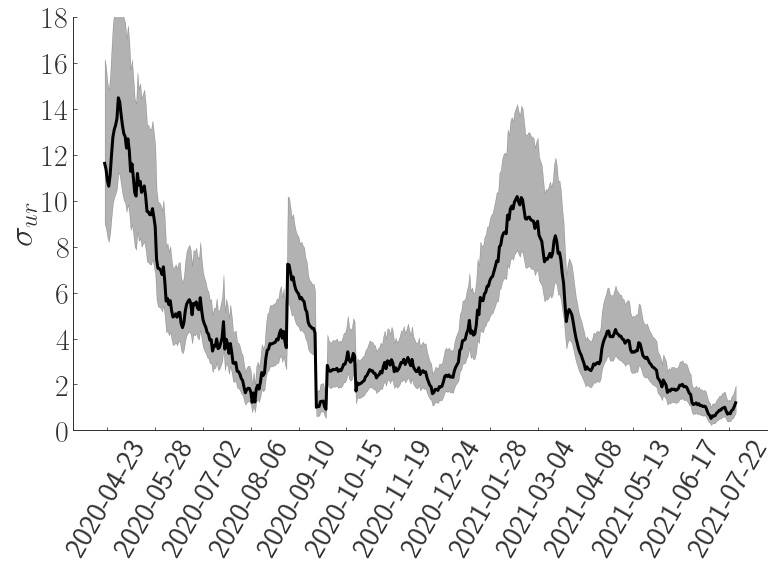

In [24]:
#generate figures 2-b and 2-c

f,(ax1) = plt.subplots(1, 1, figsize=(11, 8))

sns.lineplot(x=df['date'],y = df["undNot"],ax = ax1,linewidth=3,color='black')

ax1.fill_between(df['date'], df['undNot2'],df['undNot3'],alpha=.3,color='black')


ax1.set_xlabel('',size=25)
ax1.set_ylabel('$\sigma_{ur}$',size=35)

ax1.set(ylim=(0,18))

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(35))

ax1.yaxis.set_major_locator(mticker.MultipleLocator(2))

f.tight_layout()
f.savefig('sigma_ur.png')
f.savefig('sigma_ur.pdf')